In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import time

In [2]:
os.chdir("F://buffalo//buffalo project//css financial data")
data=pd.read_csv("financial_data.csv")
data.tail()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
17907,1498559,29,weekly,1,2665,0,4,10,4,1,...,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


# Cleaning Data

In [3]:
data.isna().any() # checking for NA , luckily no NA values
list(data)

['entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

# Histograms

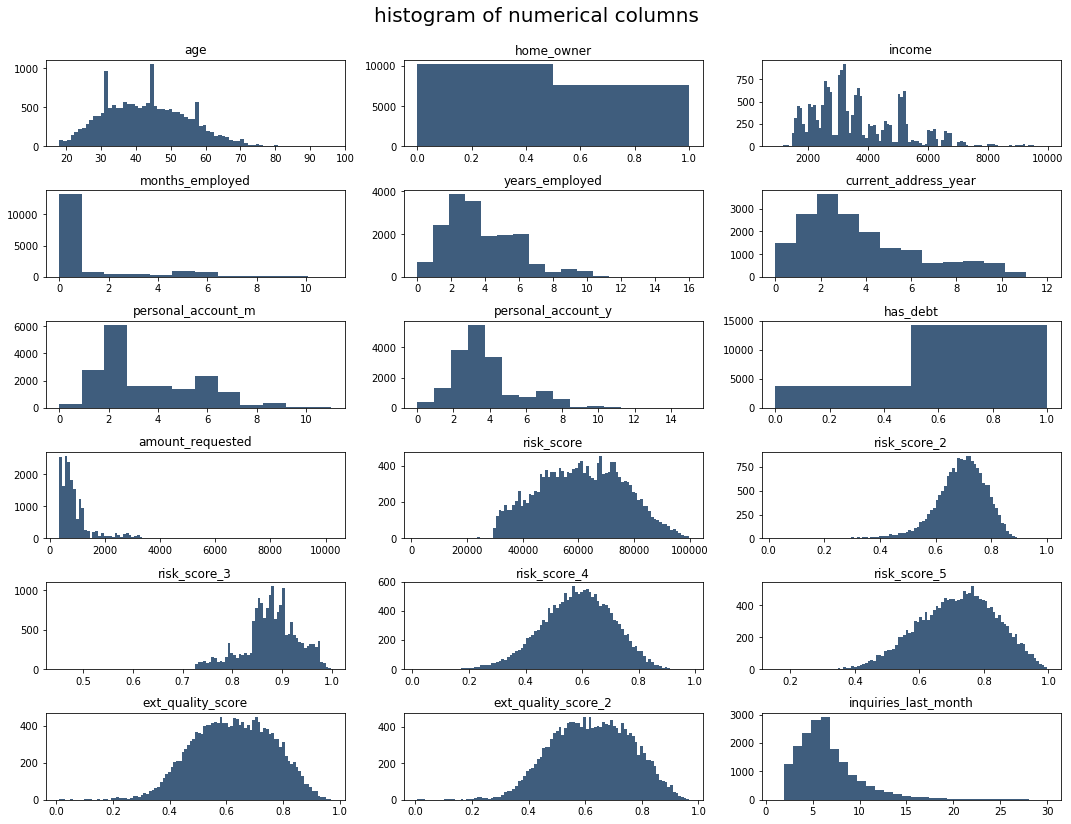

In [4]:
data2=data.drop(columns=['entry_id','e_signed','pay_schedule'])

#data2 has only numerical attributes
fig=plt.figure(figsize=(15,12))
plt.suptitle("histogram of numerical columns", fontsize=20)
for i in range(data2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(data2.columns.values[i])
    vals=np.size(data2.iloc[:,i].unique())
    if vals>=100:
        vals=100
    plt.hist(data2.iloc[:,i],bins=vals,color="#3F5D7D") 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# correlation 

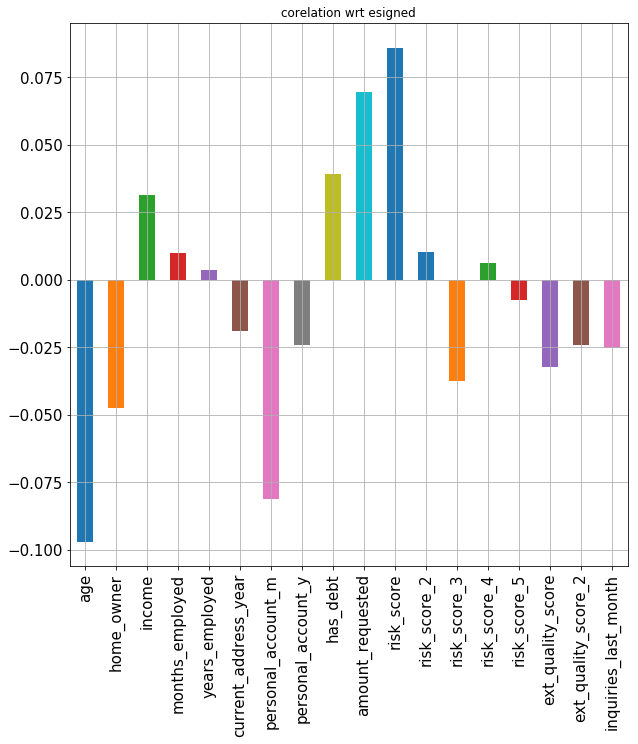

In [5]:
data2.corrwith(data.e_signed).plot.bar(figsize=(10,10),title="corelation wrt esigned",
fontsize=15,grid=True,rot=90)           

# corelation matrix

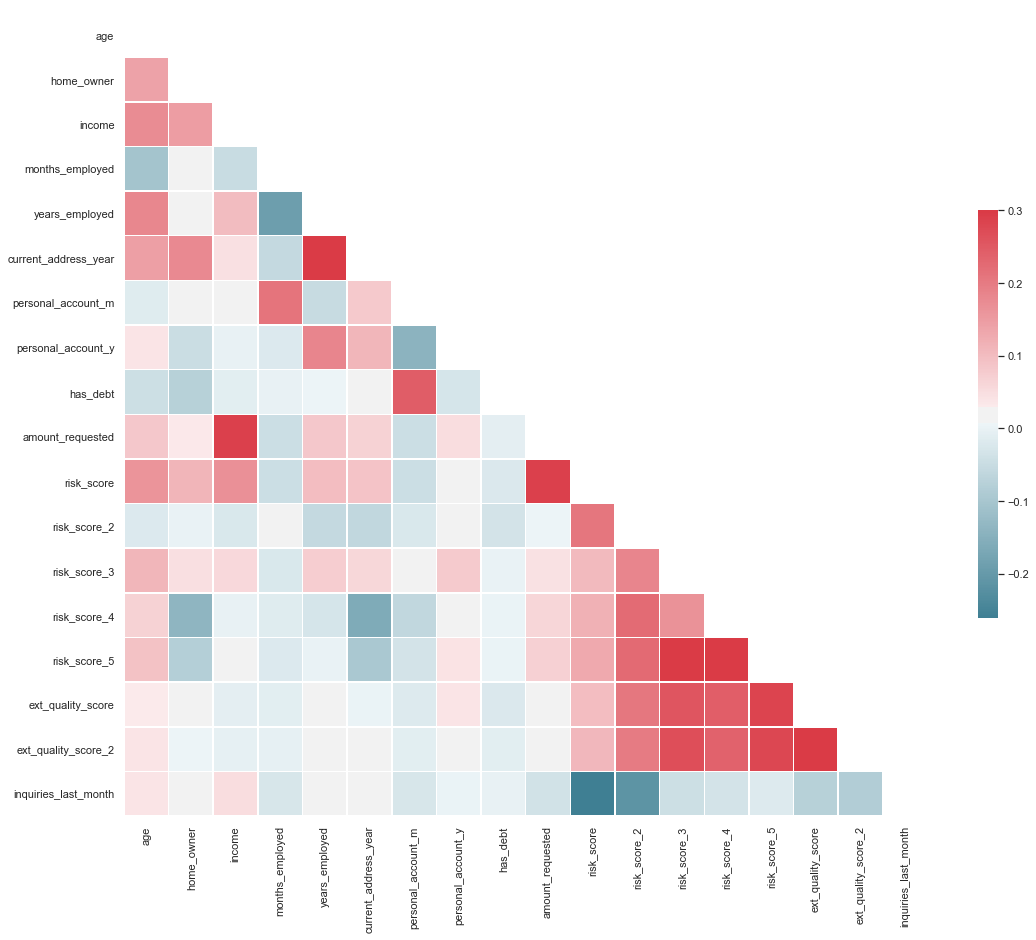

In [6]:
sn.set(style="white")
corr=data2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(18,15))
cmap=sn.diverging_palette(220,10,as_cmap=True)
sn.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,linewidths=.5,
          cbar_kws={"shrink":.5})

# Feature Engineering

In [7]:
data["personal"]=(data.personal_account_m+(data.personal_account_y*12))
data[['personal_account_m', 'personal_account_y', 'personal']].tail()


,personal_account_m,personal_account_y,personal
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18
17907,4,1,16


In [8]:
data=data.drop(columns=["personal_account_m","personal_account_y"])

# data pre processing

# one hot encoding

In [9]:
data=pd.get_dummies(data)
data.columns


Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed', 'personal',
       'pay_schedule_bi-weekly', 'pay_schedule_monthly',
       'pay_schedule_semi-monthly', 'pay_schedule_weekly'],
      dtype='object')

In [10]:
data=data.drop(columns=["pay_schedule_semi-monthly"])
# removing extra columns
response= data["e_signed"]
user=data['entry_id']
data=data.drop(columns=["e_signed",'entry_id'])

In [11]:
data.tail()

,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
17903,31,0,3245,0,5,3,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,74,0,1,0
17904,46,0,6525,0,2,1,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,39,1,0,0
17905,46,0,2685,0,5,1,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,97,0,0,1
17906,42,0,2515,0,3,5,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,18,1,0,0
17907,29,1,2665,0,4,10,1,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,16,0,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   response,
                                                   test_size=.2,
                                                   random_state=0)

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test2.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\home\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# Model Building

C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


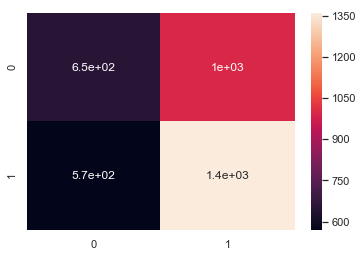

In [14]:
# logistic Regressin
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
#acc=(classification_report(y_test,y_pred))
acc=(accuracy_score(y_test,y_pred))
precision=(precision_score(y_test,y_pred))
recall=(recall_score(y_test,y_pred))
f1=(f1_score(y_test,y_pred))
results=pd.DataFrame([["lasso",acc,precision,recall,f1]],columns=['model','acc','precision','recall','f1'])

# svm

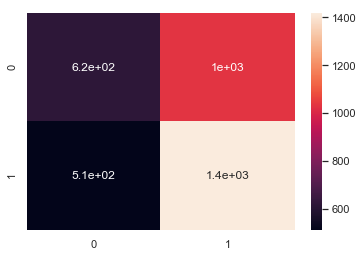

In [15]:
from sklearn.svm import SVC

classifier =SVC(random_state=0,kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
#acc=(classification_report(y_test,y_pred))
acc=(accuracy_score(y_test,y_pred))
precision=(precision_score(y_test,y_pred))
recall=(recall_score(y_test,y_pred))
f1=(f1_score(y_test,y_pred))
model_results=pd.DataFrame([["svm",acc,precision,recall,f1]],columns=['model','acc','precision','recall','f1'])

In [16]:
results=results.append(model_results)


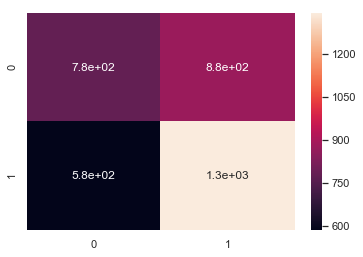

In [17]:
from sklearn.svm import SVC

classifier =SVC(random_state=0,kernel='rbf')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
r=(classification_report(y_test,y_pred))
acc=(accuracy_score(y_test,y_pred))
precision=(precision_score(y_test,y_pred))
recall=(recall_score(y_test,y_pred))
f1=(f1_score(y_test,y_pred))
model_svm_rbf=pd.DataFrame([["svm rbf",acc,precision,recall,f1]],columns=['model','acc','precision','recall','f1'])

In [18]:
results=results.append(model_svm_rbf)
results


,model,acc,precision,recall,f1
0,lasso,0.562256,0.576271,0.705394,0.634328
0,svm,0.568956,0.578240,0.735996,0.647649
0,svm rbf,0.592686,0.605678,0.697095,0.648179


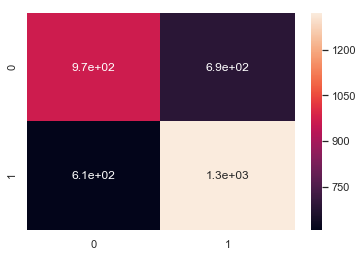

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier =RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
r=(classification_report(y_test,y_pred))
acc=(accuracy_score(y_test,y_pred))
precision=(precision_score(y_test,y_pred))
recall=(recall_score(y_test,y_pred))
f1=(f1_score(y_test,y_pred))
model_random_forest=pd.DataFrame([["random forest n=100",acc,precision,recall,f1]],columns=['model','acc','precision','recall','f1'])

In [20]:
results=results.append(model_random_forest)
results


,model,acc,precision,recall,f1
0,lasso,0.562256,0.576271,0.705394,0.634328
0,svm,0.568956,0.578240,0.735996,0.647649
0,svm rbf,0.592686,0.605678,0.697095,0.648179
0,random forest n=100,0.638470,0.657698,0.684647,0.670902


# parameter tuning using random forest grid search

In [25]:
# Grid Search
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 3726.89 seconds


(0.6366745776909116,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [26]:
rf_best_acc=grid_search.best_score_
rf_best_para=grid_search.best_params_
rf_best_acc,rf_best_para

(0.6366745776909116,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

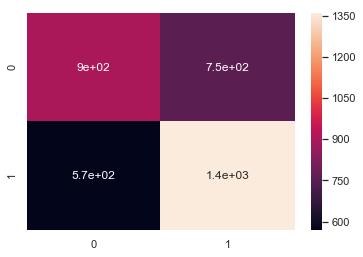

In [29]:
y_pred=grid_search.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
r=(classification_report(y_test,y_pred))
acc=(accuracy_score(y_test,y_pred))
precision=(precision_score(y_test,y_pred))
recall=(recall_score(y_test,y_pred))
f1=(f1_score(y_test,y_pred))
model_random_forest_fine_tune=pd.DataFrame([["random forest n=100,grid search",acc,precision,recall,f1]],columns=['model','acc','precision','recall','f1'])

In [30]:
results=results.append(model_random_forest_fine_tune)
results

,model,acc,precision,recall,f1
0,lasso,0.562256,0.576271,0.705394,0.634328
0,svm,0.568956,0.578240,0.735996,0.647649
0,svm rbf,0.592686,0.605678,0.697095,0.648179
0,random forest n=100,0.638470,0.657698,0.684647,0.670902
0,"random forest n=100,gsv,entropy",0.630932,0.643330,0.705394,0.672934
0,"random forest n=100,grid search",0.630932,0.643330,0.705394,0.672934
